# <center> Tree Models </center>

### Decision Tree basics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df.head(5)

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
iris_df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

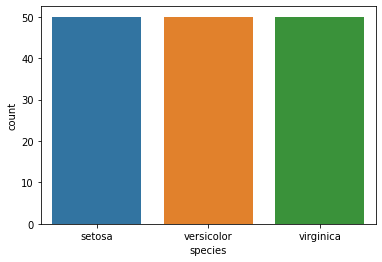

In [5]:
sns.countplot(data=iris_df, x='species')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

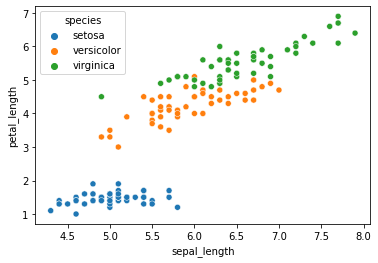

In [6]:
sns.scatterplot(data=iris_df,
                x= 'sepal_length',
                y= 'petal_length',
               hue= 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

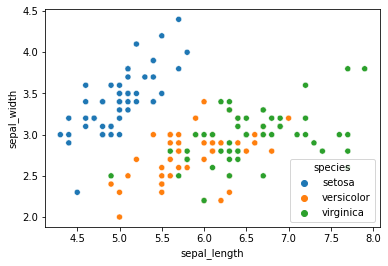

In [7]:
sns.scatterplot(data=iris_df,
                x= 'sepal_length',
                y= 'sepal_width',
               hue= 'species')

In [8]:
#bi·∫øn ƒë·ªïi c·ªôt species th√†nh d·∫°ng s·ªë
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique()) # create map dictionary
iris_df.species = le.transform(iris_df.species) #map data
iris_df.species.unique()
#c√°ch bi·∫øn ƒë·ªïi gi·ªëng h√†m .map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

array([0, 1, 2])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_df [['sepal_length', 'sepal_width']],
                                                   iris_df['species'],
                                                   test_size=0.2,
                                                   random_state=42)

In [11]:
#g·ªçi c√°i c√¢y ƒë·∫•y ra
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



- F-score c·ªßa gi·ªëng setosa l√† c√≥ gi√° tr·ªã kh√° t·ªët, nh∆∞ng 2 gi·ªëng c√≤n l·∫°i th√¨ ko. V·∫≠y n√™n F1-score trung b√¨nh k cao

In [13]:
#v·∫≠y n√™n ta s·∫Ω th√™m max_depth, max_features ƒë·ªÉ c·∫£i thi·ªán MH

In [14]:
tree = DecisionTreeClassifier(max_depth=5, #max_depth: gi·ªõi h·∫°n s·ªë t·∫ßng c·ªßa c√¢y ƒë√≥
                             max_features=2) #ƒë·ªãnh nghƒ©a s·ªë l∆∞·ª£ng feature sd ƒë·ªÉ x√¢y n√™n c√°i c√¢y )
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [15]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



In [16]:
confusion_matrix(y_test, y_pred)

array([[9, 1, 0],
       [0, 7, 2],
       [0, 5, 6]], dtype=int64)

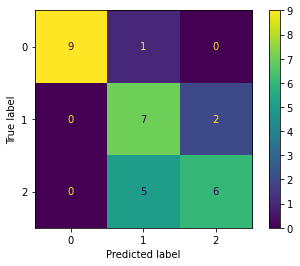

In [17]:
plot_confusion_matrix(tree, X_test, y_test)

In [18]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()#n·∫øu l∆∞·ªùi th√™m plt.show() th√¨ c√≥ th·ªÉ ƒë·ªãnh nghƒ©a n√≥ tr∆∞·ªõc (·ªü b∆∞·ªõc import pandas, numpy,...) b·∫±ng l·ªánh %matplotlib inline

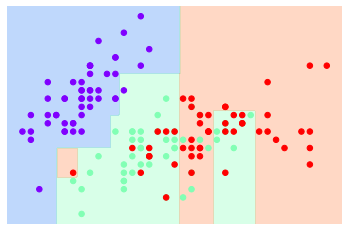

In [19]:
visualize_classifier(tree,iris_df [['sepal_length', 'sepal_width']],iris_df['species'])

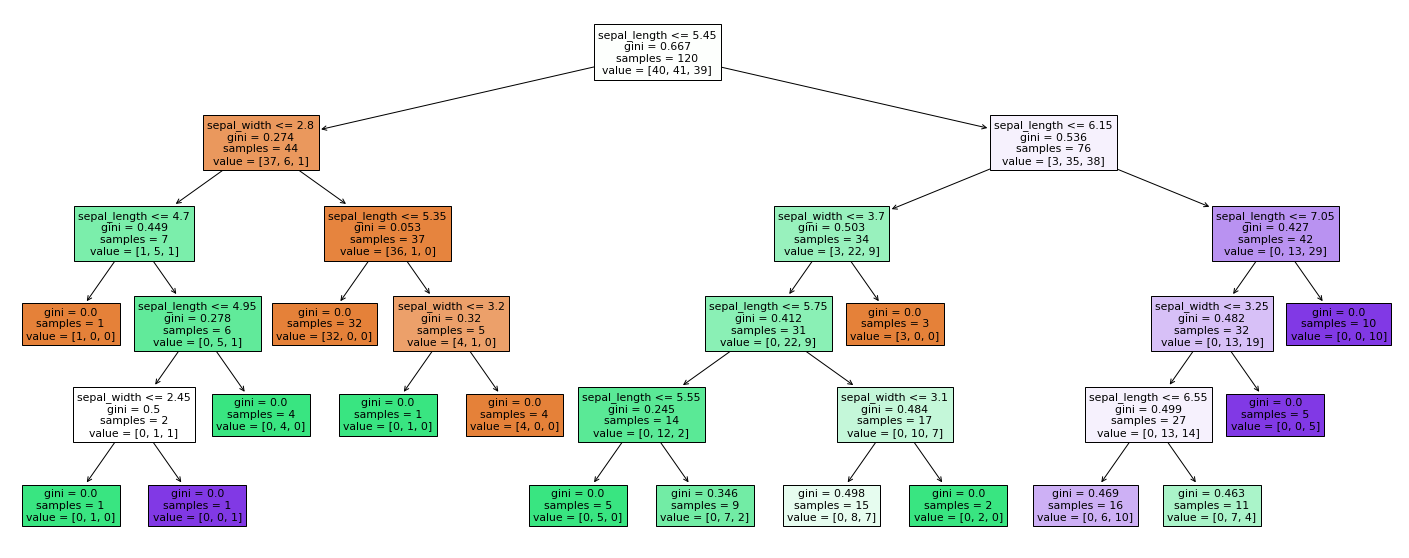

In [20]:
plt.figure(figsize=(25,10))
_ = plot_tree (tree, feature_names= X_train.columns, max_depth = 5, filled= True)
plt.show()

In [21]:
#Hi·ªÉu ƒëc GINI, Entropy, Infomation Gain

In [22]:
#G√≠a tr·ªã r·ªùi r·∫°c, B√†i to√°n Ph√¢n lo·∫°i
#gi√° tr·ªã li√™n t·ª•c, b√†i to√°n h·ªìi quy
#k c√≥ nh√£n, l√† b√†i to√°n ko gi√°m s√°t

##### Th∆∞·ªõc ƒëo ƒë√°nh gi√° vi·ªác chia d·ªØ li·ªáu trong b√†i to√°n d·∫°ng c√¢y: GINI, Entropy
- GINI l√† ch·ªâ s·ªë th·ªÉ hi·ªán m·ª©c ƒë·ªô ph√¢n lo·∫°i sau khi ch·ªçn ng·∫´u nhi√™n m·ªôt ph·∫ßn t·ª≠ t·ª´ t·∫≠p d·ªØ li·ªáu

- Entropy l√† th∆∞·ªõc ƒëo ƒë√°nh gi√° s·ª± h·ªón lo·∫°n/ƒë·ªô nhi·ªÖu c·ªßa d·ªØ li·ªáu
    + Gi√° tr·ªã Entropy c√†ng cao th√¨ ƒë·ªô h·ªón lo·∫°n c·ªßa h·ªá th·ªëng c√†ng cao v√† ng∆∞·ª£c l·∫°i, n·∫øu c√†ng th·∫•p th√¨ h·ªá th·ªëng c√†ng tr·∫≠t t·ª± (n·∫±m trong kho·∫£ng [0,1])
- Information Gain (Thu th·∫≠p th√¥ng tin)
    + D·ª±a tr√™n s·ª± gi·∫£m c·ªßa Entropy khi t·∫≠p d·ªØ li·ªáu ƒë∆∞·ª£c ph√¢n chia tr√™n m·ªôt thu·ªôc t√≠nh. ƒê·ªÉ x√¢y d·ª±ng c√¢y ra quy·∫øt ƒë·ªãnh, ta ph·∫£i t√¨m t·∫•t c·∫£ thu·ªôc t√≠nh v·ªÅ Imformation gain cao nh·∫•t.
    + B·∫£n ch·∫•t l√† ùê∫ùëéùëñùëõ(ùë•, ùëÜ) = ùê∏ùëõùë°ùëüùëúùëùùë¶ (ùëõùëñ/ùëÅ) ‚àí ùê∏ùëõùë°ùëüùëúùëùùë¶(ùë•)


### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)